Anatomy of a function
----

The R function has the following structure

```R
name <- function(arg1, arg2, ...) {
    body_of_function
    return(value)
    }
```

A function is created using the `function` keyword, followed by a series of arguments in parentheses. The main work done by the function is enclosed witin curly braces, and a `return` function is used to indicate the output of the function. Finally we can assign the funciton, just like any other R object, to a named variable for later use.

### Our first custom function

Let's write a function to calculate the mean of a vector of numbers.

In [1]:
my.mean <- function(xs) {
    n <- length(xs)
    return(sum(xs)/n)
}

In [2]:
my.mean(1:10)

[1] 5.5

Work!
----

Write a function `my.sd` that takes a vector of numbers and returns their standard deviation as calculated from the following formula:
$$
\sqrt{\frac{\sum{(x - \bar{x})^2}}{n-1}}
$$
where $x$ is some vector of numbers, $\bar{x}$ is the mean of $x$ and $n$ is th number of elements in $x$. 

What is the standard deviation of `1:10`?

In [6]:
my.sd <- function(xs) {
    n <- length(xs)
    xbar<-my.mean(xs)
    xdiff<-xs-xbar
    xdiffsquare<-xdiff^2
    sumsquare<-sum(xdiffsquare)
    sigmabar<-sqrt(sumsquare/(n-1))
    return(sigmabar)
}

my.sd(1:10)

[1] 3.02765

### Our second custom function

Let's be more ambitious - let's write a function that will generate a 4 parameter logistic function commonly used for fitting dose-response curves

$$\frac{(A-D)}{1+\left(\frac{x}{C}\right)^B} + D$$

where $x$ is the input and $A$, $B$, $C$ and $D$ are the parameters that determine the shape of the curve:

- A = minimum asymptote
- B = Hill slope
- C = inflection point
- D = maximum asymptote

In [7]:
log4 <- function(x, a, b, c, d) {
    return ((a-d)/(1 + ((x/c)^b)) + d)
}

In [8]:
x <- seq(0, 100, length.out = 51)

#### Arguments supplied by the user are matched by *position*

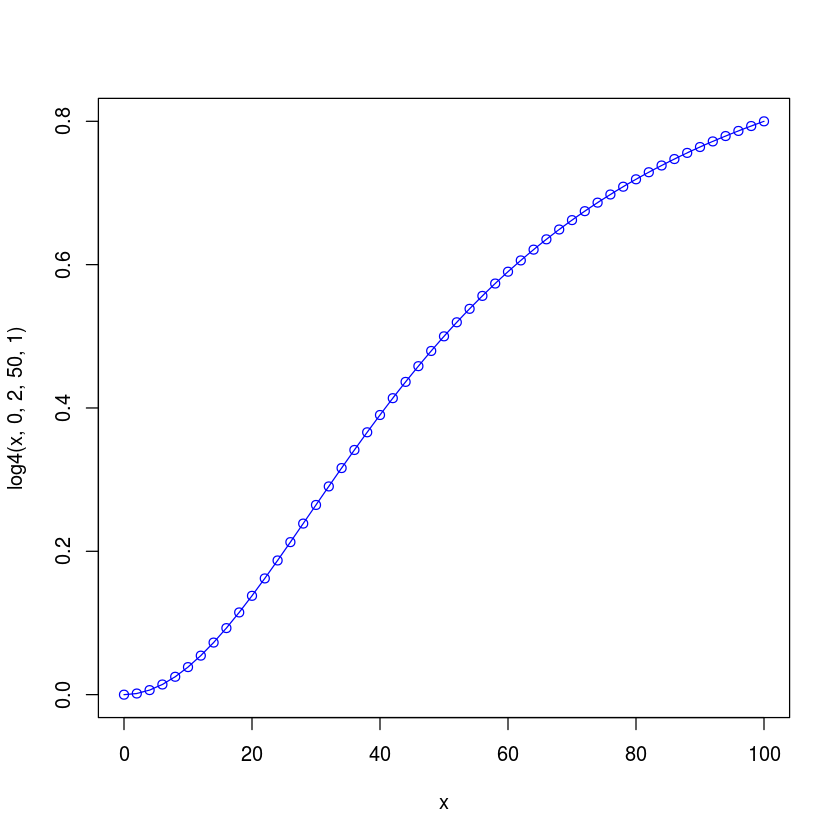

In [9]:
plot(x, log4(x, 0, 2, 50, 1), type="o", col="blue")

Default arguments
----

Perhaps we know that most of the time, the output will be normalized to fall between 0 and 1. In this case, we can set *default* arguments for $A$ and $D$ to simplify the function call.

In [10]:
log4 <- function(x, a=0, b, c, d=1) {
    return ((a-d)/(1 + ((x/c)^b)) + d)
}

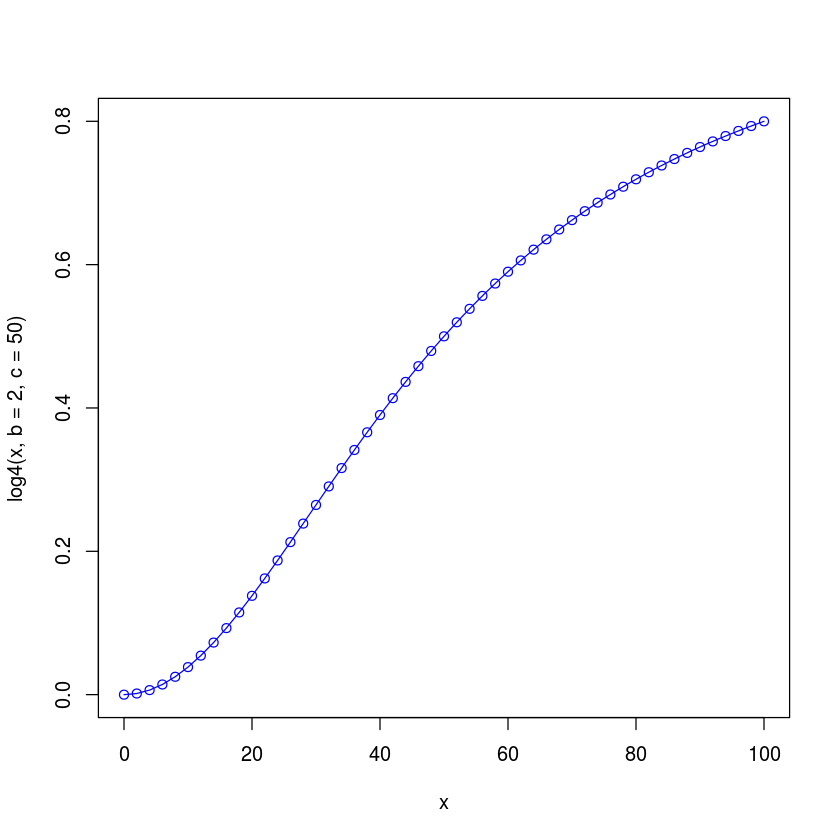

In [11]:
plot(x, log4(x, b=2, c=50), type="o", col="blue")

#### Note that we have to give *named* arguments otherwise R will assign the values to the wrong parameter.

In [12]:
plot(x, log4(x, 2, 50), type="l", col="blue")

ERROR: Error in log4(x, 2, 50): argument "c" is missing, with no default


#### In many cases, it makes sense to move arguments with default to the end of the parameter list. While we're at it, we also use more meaningful parameter names.

In [13]:
log4 <- function(x, slope, inflection, min=0, max=1 ) {
    return ((min-max)/(1 + ((x/inflection)^slope)) + max)
}

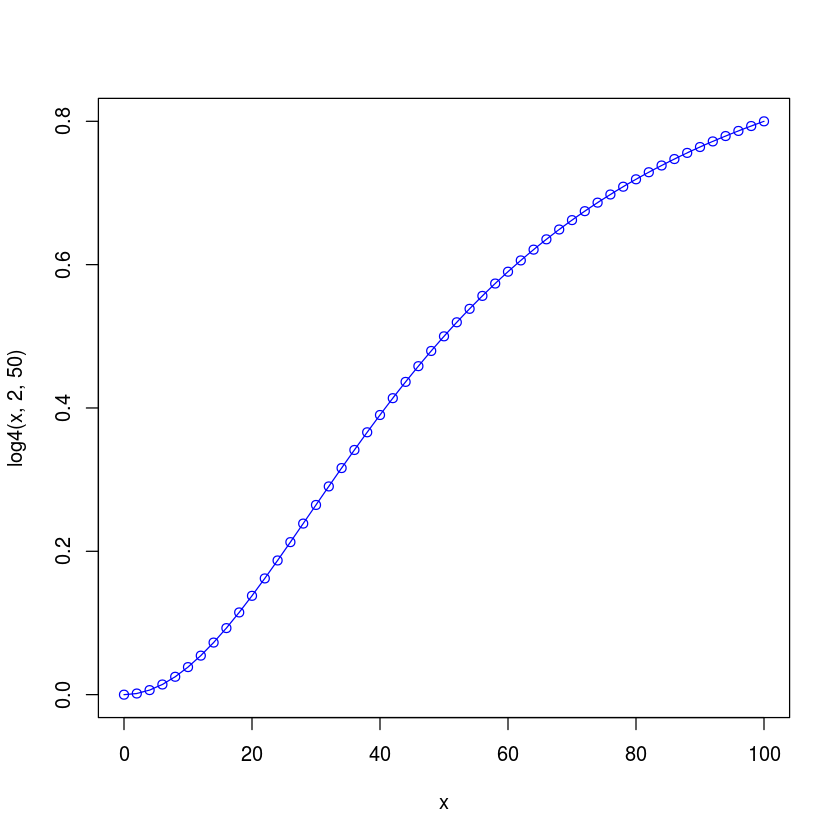

In [14]:
plot(x, log4(x, 2, 50), type="o", col="blue")

Work!
----

The 4 parameter logistic function always generates a symmetric curve. There is a 5 parameter logistic function that can generate asymmetrical curves:
```
A + (D/(1+(X/C)^B)^E)
```
where the new parameter $E$ controls the amount of asymmetry.

Write a function that will generate the new 5PL curve, giving a default value for $E$ so that when the default is used, the 5PL and 4PL functions are the same. Use meaningful parameter names instead of A, B, C, D and E.

Plot the 5 PL curve with the following values

- min = 0
- max = 1
- slope = 3
- inflection = 5
- assymetry = 2

for x between 0 and 10.



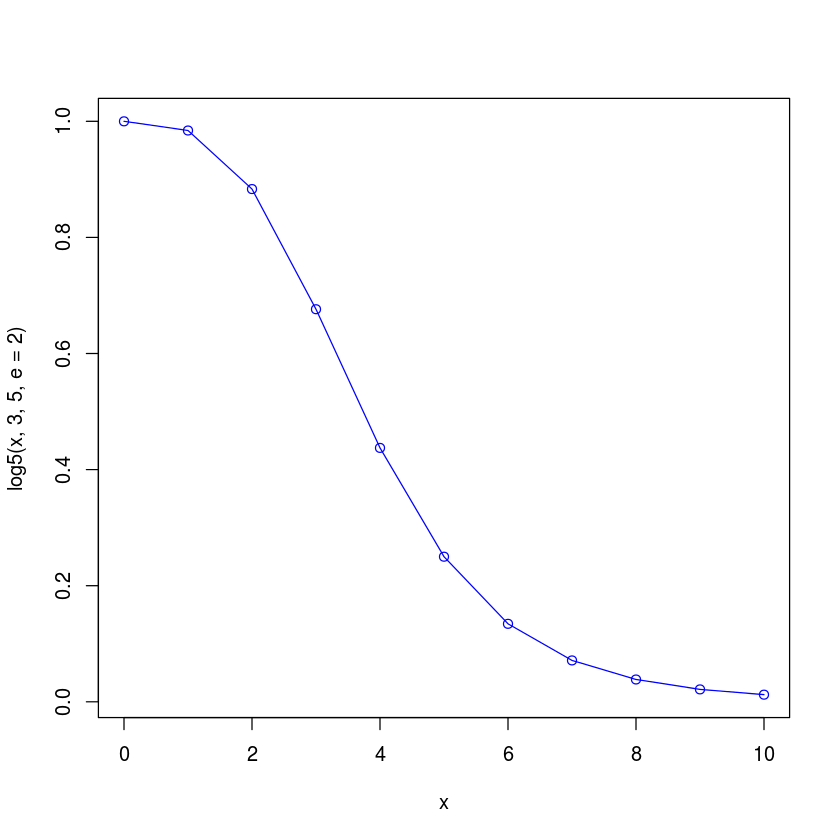

In [17]:
log5 <- function(x, b, c,a=0, d=1,e=1) {
    return ((d)/(1 + ((x/c)^b))^e + a)
}

x<-0:10
plot(x, log5(x, 3, 5,e=2), type="o", col="blue")


The EC50 for the 5PL is given by
```
C((2^(1/E) - 1)^(1/B))
```
    
Write a function to calculate the EC50 given $B$, $C$ and $E$.

Curve fitting
----

Suppose we have some experimental data that we want to fit to a 4PL function. The data is read in from a text file to an R dataframe. We will have much more discusion of data frames in subsequent lectures. For now, treat them as a convenient structure for storing tabular data.

In [31]:
df <- read.table("4PL_data.txt")

#### `with` makes the columns of the data frame appear as regular vectors

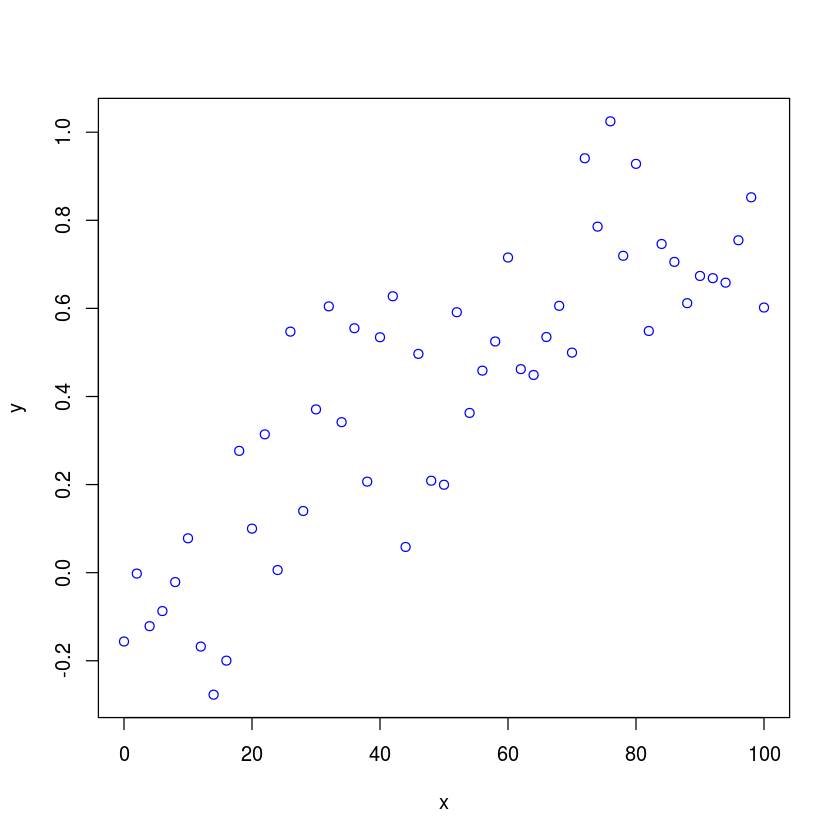

In [37]:
with(df,
    plot(x, y, type="p", col="blue")
     )

### Lets estimate the slope and inflection by nonlinear least squares minimization

In [38]:
with(df,(fit <- nls(y ~ log4(x, slope, inflection), start=list(slope=1, inflection=30), data=df)))
summary(fit)

Nonlinear regression model
  model: y ~ log4(x, slope, inflection)
   data: df
     slope inflection 
     1.885     52.557 
 residual sum-of-squares: 1.564

Number of iterations to convergence: 7 
Achieved convergence tolerance: 3.273e-06

ERROR: Error in summary(fit): object 'fit' not found


#### When there are many statments following the `with`, use curly braces to group them together as a single exprssion

ERROR: Error in predict(fit, x): object 'fit' not found


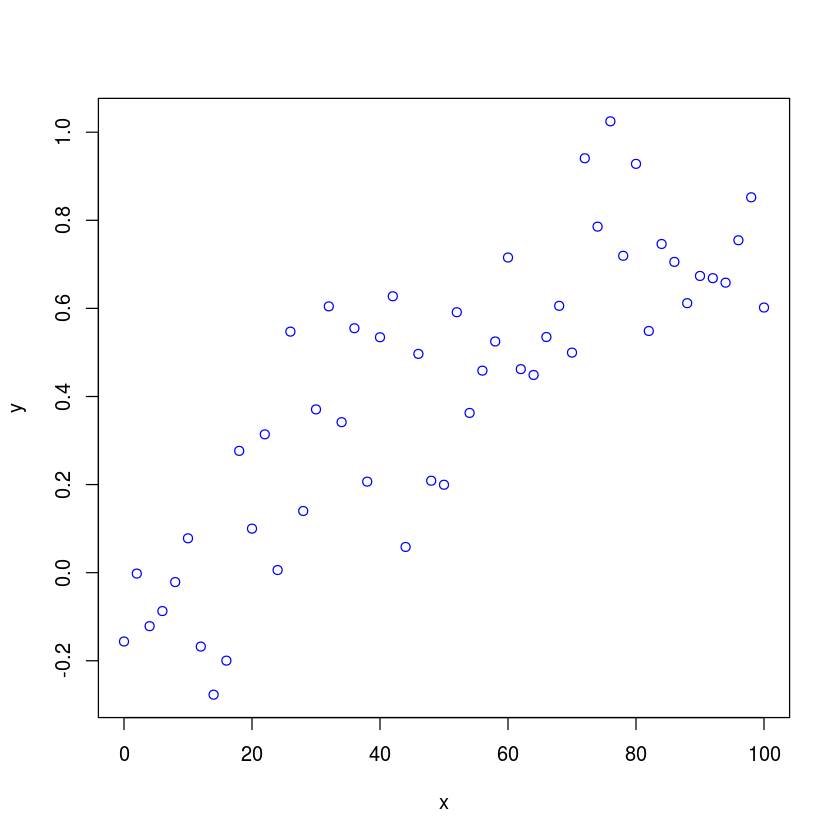

In [39]:
with(df, 
     {
         plot(x, y, 'p', col='blue')
         lines(x, predict(fit, x), col="red", lty=2)
         lines(x, log4(x, 2,50), col="blue")
         legend(70, 0, lty=1:2, col=c("blue", "red"), legend=c("True", "Fitted"))
     }
    )

Work!
----

Fit the same data to the 5 PL and estimate the slope, inflection and asymmetry parameters. You may assume that min and max are 0 and 1 respectively and do not have to be estimated. Plot the curve and fitted values as in the example above.

What is the estimated ED50? You can use `fit$m$getPars()` to find the values of all fitted parameters.

Program Logic
----

A program is just a list of commands that fit together logically. There are some basic principles and concepts that are common to every programming language and environment. We will briefly introduce these in the context of R.

<H3> Flow Control 

<H4> If Else

Sometimes, a we want to execute a command only under certain conditions. For example, suppose we are calculating an admission price to a theater, where children under age 6 are admitted free and children age 6-11 are half-price:

In [18]:
admission_price<-function(full_price = 12,age=18){
      if (age < 6)
         price_result<-0.0
      else
     {
      if (age < 12)
         price_result<-full_price/2
      else
         price_result<-full_price
     }
     return(price_result)
}

In [19]:
admission_price(full_price=100,age=10)

[1] 50

R has a nice shortcut for the if-else construct called 'ifelse':

In [44]:
admission_price_mod<-function(full_price = 12,age=18){
     ifelse (age < 6,price_result<-0,ifelse (age<12,price_result<-full_price/2,price_result<-full_price)) 
     return(price_result)
}

In [20]:
admission_price_mod(full_price=100,age=10)

ERROR: Error in eval(expr, envir, enclos): could not find function "admission_price_mod"


In [22]:
x <- 1:10
ifelse(x < 5, 0, 1)

[1] 0 0 0 0 1 1 1 1 1 1

<H4> Loops

Loops are used when a bit of code must be repeated many times. There are different types of loops, depending upon the 'termination condition' (what makes the loop stop?)

<H5>For Loops

For loops are used when we know how many times a loop must be iterated. The number of times could be variable - say 'n' times, but the important point is that at the time the loop is entered, the program knows how many iterations are necessary. For loops therefore have a counter and a termination condition that depends upon the value of the counter. One last element is an incrementor. Suppose we want a randomization scheme that assigns every third patient to a treatment:

In [46]:
patient<-1:100
treatment<-rep(0,100)
patient_assignment<-cbind(patient,treatment)
for (counter in seq(3,100,3)){
    patient_assignment[counter,2]<-1
    }
patient_assignment

patient,treatment
1,0
2,0
3,1
4,0
5,0
6,1
7,0
8,0
9,1
10,0


<H4> While loop

A while loop is used when the termination condition can happen at any time, depending upon some action within the loop. Suppose we want to simulate a coin toss, but stop when we have 10 heads:

In [25]:
nheads<-0
while (nheads<10){
       toss<-rbinom(1,1,0.5)
       if (nheads == 0)
           experiment<-toss
       else
           experiment<-c(toss,experiment)
       nheads<-nheads+toss
    }

In [26]:
experiment


[1] 1 1 1 1 1 1 0 1 1 0 1 0 0 1

<H2> Work!


Write loops for the following:

* Compute the mean of the vector v<-c(1,4,2,4,6,8,1,0) using a `for` loop
* Flip a coin until you get a head


What is wrong with the following code:

In [28]:
v<-c(1,4,2,4,6,8,1,0)
s<-0
for (i in 1:length(v))
    s<-s+v[i]
s/length(v)

[1] 3.25

In [23]:
# n<-1
# while (n>0)
#    print(n-1)

<H2> Vectorization

Now that we have learned to write loops, it is time to tell you to avoid them at all costs! This is not always possible, and sometimes it is a whole lot easier to write a loop than to figure out how to get R to do what you want using so-called 'vectorized' operations, but it is a whole lot faster. This doesn't really matter when you have a small amount of data to process. But when sample sizes get large, using loops can slow you down to the point of futility.

What is vectorization? Simply put, it means feeding a whole vector to an R function, rather than doing operations on each element. For example, you just wrote a `for` loop to compute the mean of a vector. You can do that - but it would be much better to just use the R base function `mean`. Compare the following: 

In [29]:
v<-rnorm(1000000)
sum<-0
system.time(for (i in 1:length(v))
    sum<-sum+v[i])
    
mean_v<-sum/length(v)

   user  system elapsed 
  0.472   0.004   0.476 

In [30]:
system.time(mean_v<-mean(v))

   user  system elapsed 
  0.002   0.000   0.002 

<H3>Simple Examples

In [31]:
v1<-runif(10)
v2<-runif(10)
print(v1)
print(v2)
print(v1+v2)

 [1] 0.686323807 0.229189741 0.943499958 0.008288366 0.512752363 0.104759536
 [7] 0.430474185 0.548812798 0.956030584 0.626014339
 [1] 0.6021211 0.0143703 0.2431529 0.3023300 0.6619266 0.8759128 0.9916874
 [8] 0.6461957 0.2210742 0.1097788
 [1] 1.2884449 0.2435600 1.1866529 0.3106184 1.1746789 0.9806723 1.4221616
 [8] 1.1950085 1.1771048 0.7357931


In [32]:
v1*v2

[1] 0.413250041 0.003293525 0.229414789 0.002505822 0.339404406 0.091760216
 [7] 0.426895839 0.354640480 0.211353693 0.068723106

In [33]:
v1%*%v2

2.141242


In [29]:
v1^2

[1] 1.474391e-03 3.397016e-01 4.130000e-01 9.406063e-01 8.543286e-03
 [6] 6.471236e-01 9.337818e-02 4.261080e-01 1.791209e-05 1.417036e-01

In [30]:
sqrt(v1)

[1] 0.19595355 0.76343909 0.80165500 0.98480892 0.30402286 0.89690576
 [7] 0.55279149 0.80794152 0.06505588 0.61354327

<h2> Work!

Write a program to simulate 10,000 coin tosses and count the number of heads.

In [41]:
v<-rbinom(10000,1,prob=.5)
#print(v)
sum(v)

[1] 5059